## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?



In [1]:
# imports and data loading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
# col names: https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

vote_cols = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid',
'religious-groups-in-schools', 'anti-satellite-test-ban',
'aid-to-nicaraguan-contras', 'mx-missile', 'immigration',
'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue',
'crime', 'duty-free-exports', 'export-administration-act-south-africa']

vote_data = pd.read_csv(url, header=None, names=vote_cols, na_values='?')
vote_data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [2]:
# Replace the y's and n's with 1's and 0's
vote_data = vote_data.replace(to_replace=['y', 'n'], value=[1, 0])
vote_data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# straight from the lecture notes
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = np.array(data)
    data_mean = np.mean(data)
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1) # Look up the corresponding tstat
    return (data_mean, data_mean - moe, data_mean + moe)

In [0]:
# Make sure results are consistent across sessions
np.random.seed(413)

In [5]:
# Confidence interval for a sample of votes on the 'adoption-of-the-budget-resolution'
CI = confidence_interval(vote_data['adoption-of-the-budget-resolution'
                                    ].sample(n=50, random_state=612).dropna())
CI

(0.5918367346938775, 0.4492002971965695, 0.7344731721911856)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


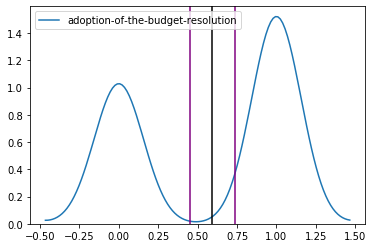

In [23]:
# Graph the confidence interval
sns.kdeplot(vote_data['adoption-of-the-budget-resolution'])
plt.axvline(x=CI[1], color='purple')
plt.axvline(x=CI[2], color='purple')
plt.axvline(x=CI[0], color='k');

Given the above graph of our voting data sample, along with the confidence interval, we can infer that 95% of the time, if this congress were to vote on 'adoption-of-the-budget-resolution', the outcome would be between about 45% and 73.4% in favor.

Since the natural null hypothesis of 50% is within this confidence interval, we fail to reject the null hypothesis -- we can't really distinguish these results from a random outcome. (We could, however, increase our sample size, number of samples, and/or adjust the confidence level to see if these results change)

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [7]:
# Load in the uci flags dataset
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data"

cols = ["name", "landmass", "zone", "area", "population", "language",
        "religion", "bars", "stripes", "colours", "red", "green", "blue",
        "gold", "white", "black", "orange", "mainhues", "circles",
        "crosses", "saltires", "quarters", "sunstars", "crescent", "triangle",
        "icon", "animate", "text", "topleft", "botright"]

flags_data = pd.read_csv(url2, header=None, names=cols)
flags_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhues,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [8]:
print(flags_data.shape)
flags_data.dtypes

(194, 30)


name          object
landmass       int64
zone           int64
area           int64
population     int64
language       int64
religion       int64
bars           int64
stripes        int64
colours        int64
red            int64
green          int64
blue           int64
gold           int64
white          int64
black          int64
orange         int64
mainhues      object
circles        int64
crosses        int64
saltires       int64
quarters       int64
sunstars       int64
crescent       int64
triangle       int64
icon           int64
animate        int64
text           int64
topleft       object
botright      object
dtype: object

In [9]:
# Clean it up: https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names

landmass_map = {1:'N.America', 2:'S.America', 3:'Europe', 4:'Africa',
                5:'Asia', 6:'Oceania'}
zone_map = {1:'NE', 2:'SE', 3:'SW', 4:'NW'}
language_map = {1:'English', 2:'Spanish', 3:'French', 4:'German',
                5:'Slavic', 6:'Other Indo-European', 7:'Chinese',
                8:'Arabic', 9:'Japanese/Turkish/Finnish/Magyar', 10:'Others'}
religion_map = {0:'Catholic', 1:'Other Christian', 2:'Muslim', 3:'Buddhist',
                4:'Hindu', 5:'Ethnic', 6:'Marxist', 7:'Others'}

column_maps = {'landmass':landmass_map, 'zone':zone_map, 'language':language_map,
          'religion':religion_map}

for col in list(column_maps.keys()):
    flags_data[col] = flags_data[col].map(column_maps[col])

flags_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhues,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,NE,648,16,Others,Muslim,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,NE,29,3,Other Indo-European,Marxist,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,NE,2388,20,Arabic,Muslim,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,SW,0,0,English,Other Christian,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,NE,0,0,Other Indo-European,Catholic,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [10]:
# Crosstab of the language and mainhues columns
x_table = pd.crosstab(flags_data['language'], flags_data['mainhues'], margins=True)
x_table

mainhues,black,blue,brown,gold,green,orange,red,white,All
language,,,,,,,,,
Arabic,2,0,1,0,6,0,10,0,19
Chinese,0,1,0,0,0,0,2,1,4
English,1,17,0,2,7,0,11,5,43
French,1,1,0,4,4,1,3,3,17
German,1,0,0,1,0,0,4,0,6
Japanese/Turkish/Finnish/Magyar,0,0,0,0,0,0,2,2,4
Other Indo-European,0,3,0,5,4,2,10,6,30
Others,0,9,1,5,9,1,19,2,46
Slavic,0,0,0,0,0,0,2,2,4


In [11]:
x_table.shape

(11, 9)

In [0]:
# Calculate the column and row sums
row_sums = x_table.iloc[:-1, -1]
col_sums = x_table.iloc[-1, :-1]

In [13]:
row_sums

language
Arabic                             19
Chinese                             4
English                            43
French                             17
German                              6
Japanese/Turkish/Finnish/Magyar     4
Other Indo-European                30
Others                             46
Slavic                              4
Spanish                            21
Name: All, dtype: int64

In [14]:
col_sums

mainhues
black      5
blue      40
brown      2
gold      19
green     31
orange     4
red       71
white     22
Name: All, dtype: int64

\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
# Not sure how to refactor nested for loops, so just copying from the lecture notes
total = x_table.iloc[-1,-1]
expected = []
for i in range(len(row_sums)):
    expected_row=[]
    for column in col_sums:
        expected_val = column * row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)

expected = np.array(expected)

In [16]:
expected.shape

(10, 8)

In [17]:
observed = x_table.iloc[:-1, :-1]
observed.shape

(10, 8)

In [0]:
chi_squared_stat = ((observed - expected)**2/(expected))

In [19]:
chi_squared_stat

mainhues,black,blue,brown,gold,green,orange,red,white
language,,,,,,,,
Arabic,4.658112,3.917526,3.301139,1.860825,2.893468,0.391753,1.334631,2.154639
Chinese,0.103093,0.037242,0.041237,0.391753,0.639175,0.082474,0.196312,0.658154
English,0.010573,7.462491,0.443299,1.161157,0.002417,0.886598,1.425944,0.003139
French,0.720497,1.790449,0.175258,3.274856,0.606438,1.203457,1.668211,0.596284
German,4.621306,1.237113,0.061856,0.289383,0.958763,0.123711,1.482261,0.680412
Japanese/Turkish/Finnish/Magyar,0.103093,0.824742,0.041237,0.391753,0.639175,0.082474,0.196312,5.271790
Other Indo-European,0.773196,1.640567,0.309278,1.446916,0.131449,3.085223,0.087363,1.983880
Others,1.185567,0.024753,0.582922,0.054354,0.370151,0.002801,0.278407,1.983293
Slavic,0.103093,0.824742,0.041237,0.391753,0.639175,0.082474,0.196312,5.271790


In [0]:
#TODO: Degrees of Freedom

In [0]:
#TODO: Calculate p-value from chi-stat

In [20]:
# Now with scipy:
stats.chi2_contingency(observed)

(91.28589767542974,
 0.011424472187592363,
 63,
 array([[ 0.48969072,  3.91752577,  0.19587629,  1.86082474,  3.03608247,
          0.39175258,  6.95360825,  2.15463918],
        [ 0.10309278,  0.82474227,  0.04123711,  0.39175258,  0.63917526,
          0.08247423,  1.46391753,  0.45360825],
        [ 1.10824742,  8.86597938,  0.44329897,  4.21134021,  6.87113402,
          0.88659794, 15.7371134 ,  4.87628866],
        [ 0.43814433,  3.50515464,  0.17525773,  1.66494845,  2.71649485,
          0.35051546,  6.22164948,  1.92783505],
        [ 0.15463918,  1.2371134 ,  0.06185567,  0.58762887,  0.95876289,
          0.12371134,  2.19587629,  0.68041237],
        [ 0.10309278,  0.82474227,  0.04123711,  0.39175258,  0.63917526,
          0.08247423,  1.46391753,  0.45360825],
        [ 0.77319588,  6.18556701,  0.30927835,  2.93814433,  4.79381443,
          0.6185567 , 10.97938144,  3.40206186],
        [ 1.18556701,  9.48453608,  0.4742268 ,  4.50515464,  7.35051546,
          0.94845

In [21]:
pvalue = stats.chi2_contingency(observed)[1]
pvalue

0.011424472187592363

Since our p-value of 1.14% is within the standard confidence threshold of 95%, we can reject the null hypothesis and begin affirming that there is some relationship between a country's flag's main color and the predominant language of that country.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)